Name: Tarun Tanmay Roll No: N049 Batch: MBATech CE 

In [ ]:
#Experimet Number 5
#Multiple Linear Regression
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [ ]:
df=pd.read_csv('MLR_data.csv')
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


Text(0.5, 1.0, 'IV(x1) to IV(x2)')

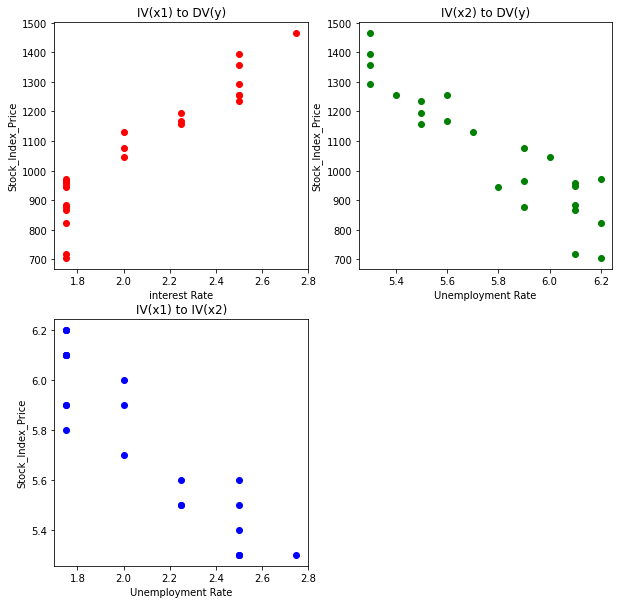

In [ ]:
#Relationship between independent variable & dependent variable:
#Stock index price: dependent on interest rate and unemployment rate or not?
plt.figure(figsize=(10,10))

x1=df['Interest_Rate']
x2=df['Unemployment_Rate']
y=df['Stock_Index_Price']

plt.subplot(2,2,1)
plt.scatter(x1,y,color='red')
plt.xlabel('interest Rate')
plt.ylabel('Stock_Index_Price')
plt.title('IV(x1) to DV(y)')

plt.subplot(2,2,2)
plt.scatter(x2,y,color='green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock_Index_Price')
plt.title('IV(x2) to DV(y)')

plt.subplot(2,2,3)
plt.scatter(x1,x2,color='blue')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock_Index_Price')
plt.title('IV(x1) to IV(x2)')

In [ ]:
X=df[['Interest_Rate', 'Unemployment_Rate']]
Y=df['Stock_Index_Price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
print('Intercept:',regr.intercept_)
print('Coefficent:',regr.coef_)

b0=regr.intercept_
b1=regr.coef_[0]
b2=regr.coef_[1]

New_Interest_Rate=2.75
New_Unemployment_Rate=5.3
New_Stock_Index_Price=b0+(b1*New_Interest_Rate)+(b2*New_Unemployment_Rate)

print('New_Stock_Index_Price: ', New_Stock_Index_Price)


Intercept: 1798.4039776258546
Coefficent: [ 345.54008701 -250.14657137]
New_Stock_Index_Price:  1422.8623886471935


In [ ]:
new_stock_price_pred=regr.predict([[New_Interest_Rate,New_Unemployment_Rate]])
print('New Stock Index Price: ', new_stock_price_pred)

New Stock Index Price:  [1422.86238865]


In [ ]:
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           4.04e-11
Time:                        16:09:49   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

In [ ]:
x1=np.array(x1)
x1=x1.reshape((-1,1))
regr1=linear_model.LinearRegression()
regr1.fit(x1,y)
regr1_b0=regr1.intercept_
regr1_b1=regr1.coef_
print('Intercept:',regr.intercept_)
print('Coefficent:',regr.coef_)

New_Interest_Rate=2.75
New_Unemployment_Rate=5.3
New_Stock_Index_Price=regr1_b0+(regr1_b1*New_Interest_Rate)

print('New_Stock_Index_Price: ', New_Stock_Index_Price)

Intercept: 1798.4039776258546
Coefficent: [ 345.54008701 -250.14657137]
New_Stock_Index_Price:  [1452.09638554]


In [ ]:
model1=sm.OLS(y,x1).fit()
predictions1=model1.predict(x1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4897.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                    2.63e-28
Time:                        16:09:59   Log-Likelihood:                         -137.52
No. Observations:                  24   AIC:                                      277.0
Df Residuals:                      23   BIC:                                      278.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           517.4938      7.395     69.978      0.000     502.196     532.792
==============================================================================
Omnibus:                        8.933   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.784
Skew:                          -1.171   Prob(JB):                       0.0336
Kurtosis:                       4.140   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x2=np.array(x2)
x2 = x2.reshape((-1,1))
regr2 = linear_model.LinearRegression()
regr2.fit(x2,y)
regr2_b0 = regr2.intercept_
regr2_b1 = regr2.coef_[0]
print('Intercept: ',regr2_b0)
print('Slope: ',regr2_b1)

New_Unmployment_Rate = 5.3
New_Stock_Index_Price2 = regr2_b0 + (regr2_b1 * New_Unmployment_Rate)
print('New Stock Index Price: ',New_Stock_Index_Price2)

Intercept:  4471.339321357287
Slope:  -588.9620758483036
New Stock Index Price:  1349.8403193612785


In [ ]:
model2 = sm.OLS(y,x2).fit()
predictions2 = model2.predict(x2)
print_model2 = model2.summary()
print(print_model2)

                                 OLS Regression Results                                
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              374.4
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                    9.92e-16
Time:                        16:10:13   Log-Likelihood:                         -167.71
No. Observations:                  24   AIC:                                      337.4
Df Residuals:                      23   BIC:                                      338.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Conclusion**:
1. The given data set had 2 independent variables which are negatively correlated with each other.
2. Both Interest Rate and Unemployment rate are correlated with Stock Index Price- which satisfies condition from Multiple linear Regression.
3. Overall model ha high value of r square and f statistics, so it is fitting the model.
4. However,p values for both independent variables is greater than 0.001 -> both are insignificant. 
5. Conclusion 4 contradicts the conclusion 3, so there is an ambihuity in OLS Regression results. It is because there is a Collinearity between the given two independent variables.
6. Interest Rate and Stock Index Price have more correlation than Unemployment rate and Stock Index Price (r square, f, p values) regression model fits both these variables. 
7. Results of the revised model show that quality of the model has improved in terms of R square, f stats and p values.